## Sentence completion with LSTM
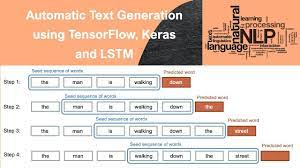

Sentence completion with LSTM involves training a recurrent neural network model capable of capturing long-term dependencies. The process entails preparing a dataset of input-output pairs, tokenizing sentences into word indices, and converting them into sequences. The LSTM model architecture consists of embedding, LSTM, and dense layers. Training involves splitting the data, defining a loss function, and optimizing it using backpropagation. During inference, the model predicts the next word by generating a probability distribution over the vocabulary. The word with the highest probability is selected, appended to the input sequence, and the process repeats until the desired completion length is achieved.

## I. Importing Nassaries Liabiries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup


import warnings

warnings.filterwarnings("ignore")

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

## II. Web scripting: 
Web scripting refers to the use of programming languages like Python to automate the collection of text data from websites. It involves techniques like web scraping, using libraries like BeautifulSoup, and interacting with web APIs to extract and process textual information for analysis or other purposes.

In [3]:
url = "https://insights.blackcoffer.com/ai-in-healthcare-to-improve-patient-outcomes/"

In [4]:
#Requests: Python library for making HTTP requests easily
page = requests.get(url)

In [5]:
#Byte string containing the raw content of a web page obtained using the requests library.
page.content

b'<!doctype html >\r\n<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]-->\r\n<!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]-->\r\n<!--[if gt IE 8]><!--> <html lang="en-US"> <!--<![endif]-->\r\n<head>\r\n    <title>AI in healthcare to Improve Patient Outcomes | Blackcoffer Insights</title>\r\n    <meta charset="UTF-8" />\r\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\r\n    <link rel="pingback" href="https://insights.blackcoffer.com/xmlrpc.php" />\r\n    <meta name=\'robots\' content=\'max-image-preview:large\' />\n<link rel=\'dns-prefetch\' href=\'//fonts.googleapis.com\' />\n<link rel="alternate" type="application/rss+xml" title="Blackcoffer Insights &raquo; Feed" href="https://insights.blackcoffer.com/feed/" />\n<link rel="alternate" type="application/rss+xml" title="Blackcoffer Insights &raquo; Comments Feed" href="https://insights.blackcoffer.com/comments/feed/" />\n<script type="text/javascript">\nwindow._wpemojiSettings = {"baseUrl

In [6]:
# BeautifulSoup: Python library for parsing and navigating HTML and XML documents with ease.
soup = BeautifulSoup(page.content,"html.parser")
soup

<!DOCTYPE html >

<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]-->
<!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]><!--> <html lang="en-US"> <!--<![endif]-->
<head>
<title>AI in healthcare to Improve Patient Outcomes | Blackcoffer Insights</title>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://insights.blackcoffer.com/xmlrpc.php" rel="pingback"/>
<meta content="max-image-preview:large" name="robots">
<link href="//fonts.googleapis.com" rel="dns-prefetch"/>
<link href="https://insights.blackcoffer.com/feed/" rel="alternate" title="Blackcoffer Insights » Feed" type="application/rss+xml"/>
<link href="https://insights.blackcoffer.com/comments/feed/" rel="alternate" title="Blackcoffer Insights » Comments Feed" type="application/rss+xml"/>
<script type="text/javascript">
window._wpemojiSettings = {"baseUrl":"https:\/\/s.w.org\/images\/core\/emoji\/14.0.0\/72x72\/","ext":".png","svgUr

In [7]:
## find_all: BeautifulSoup method to search and extract elements from HTML/XML documents based on specified criteria
data1 = soup.find_all(attrs={"class":"tdb-block-inner td-fix-index"})

In [8]:
## select text data
data1 = data1[14]
data1

<div class="tdb-block-inner td-fix-index">
<p><strong>Introduction</strong></p>
<p>“If anything kills over 10 million people in the next few decades, it will be a highly infectious virus rather than a war. Not missiles but microbes.” Bill Gates’s remarks at a TED conference in 2014, right after the world had avoided the Ebola outbreak. When the new, unprecedented, invisible virus hit us, it met an overwhelmed and unprepared healthcare system and oblivious population. This public health emergency demonstrated our lack of scientific consideration and underlined the alarming need for robust innovations in our health and medical facilities. For the past few years, artificial intelligence has proven to be of tangible potential in the healthcare sectors, clinical practices, translational medical and biomedical research.</p>
<p>After the first case was detected in China on December 31st 2019, it was an AI program developed by BlueDot that alerted the world about the pandemic. It was quick to 

## III. Text preporcessing

In [9]:
# replace same text 
data2 = data1.text.replace("""<div class="tdb-block-inner td-fix-index"><ul class="tdb-tags"><li><span>Tags</span></li><li><a href="https://insights.blackcoffer.com/tag/ai/">AI</a></li><li><a href="https://insights.blackcoffer.com/tag/algorithm/">algorithm</a></li><li><a href="https://insights.blackcoffer.com/tag/covid/">Covid</a></li><li><a href="https://insights.blackcoffer.com/tag/healthcare/">Healthcare</a></li><li><a href="https://insights.blackcoffer.com/tag/ml/">Ml</a></li><li><a href="https://insights.blackcoffer.com/tag/pandemic/">pandemic</a></li><li><a href="https://insights.blackcoffer.com/tag/patient-outcomes/">patient outcomes</a></li></ul></div>""","")
data3 = data2.replace("\n","").replace("\xa0","")

In [10]:
data3[:1000]

'Introduction“If anything kills over 10 million people in the next few decades, it will be a highly infectious virus rather than a war. Not missiles but microbes.” Bill Gates’s remarks at a TED conference in 2014, right after the world had avoided the Ebola outbreak. When the new, unprecedented, invisible virus hit us, it met an overwhelmed and unprepared healthcare system and oblivious population. This public health emergency demonstrated our lack of scientific consideration and underlined the alarming need for robust innovations in our health and medical facilities. For the past few years, artificial intelligence has proven to be of tangible potential in the healthcare sectors, clinical practices, translational medical and biomedical research.After the first case was detected in China on December 31st 2019, it was an AI program developed by BlueDot that alerted the world about the pandemic. It was quick to realise AI’s ability to analyse large chunks of data could help in detecting p

In [11]:
len(data3)

12138

In [12]:
#re: Python module for working with regular expressions, allowing pattern matching and string manipulation.
import re
data3 = data3.lower()
data3 = re.sub("[^a-z ]"," ",data3)

In [13]:
data3 = data3.replace("  ","")

In [14]:
data3[:1000]

'introduction if anything kills overmillion people in the next few decadesit will be a highly infectious virus rather than a warnot missiles but microbes bill gates s remarks at a ted conference in right after the world had avoided the ebola outbreakwhen the newunprecedentedinvisible virus hit usit met an overwhelmed and unprepared healthcare system and oblivious populationthis public health emergency demonstrated our lack of scientific consideration and underlined the alarming need for robust innovations in our health and medical facilitiesfor the past few yearsartificial intelligence has proven to be of tangible potential in the healthcare sectorsclinical practicestranslational medical and biomedical research after the first case was detected in china on december st it was an ai program developed by bluedot that alerted the world about the pandemicit was quick to realise ai s ability to analyse large chunks of data could help in detecting patterns and identifying and tracking the pos

In [15]:
len(data3)

11760

## IV. Tokenization of text
A tokenizer is a tool or library used to break down a text or document into smaller units such as words, sentences, or tokens. It helps in natural language processing tasks like text analysis, language modeling, and information retrieval by splitting the input into meaningful units for further processing

In [16]:
from keras.preprocessing.text import Tokenizer

Tokenizer = Tokenizer()

Tokenizer.fit_on_texts([data3])

In [17]:
#Pickle: Python module for serializing and deserializing Python objects, enabling easy object persistence and storage.
import pickle
with open("Token1.pkl","wb") as file:
    pickle.dump(Tokenizer,file)

In [18]:
#Tokenizer.texts_to_sequences: Method in tokenizer library that converts input texts into sequences of corresponding numerical representations
sequence_data = Tokenizer.texts_to_sequences([data3])[0]

In [19]:
sequence_data[:10]

[180, 181, 182, 183, 104, 50, 5, 1, 105, 106]

In [20]:
#Tokenizer.word_index: Dictionary mapping words to their respective numerical indices
Tokenizer.word_index

{'the': 1,
 'and': 2,
 'to': 3,
 'of': 4,
 'in': 5,
 'a': 6,
 'that': 7,
 'can': 8,
 'ai': 9,
 'with': 10,
 'on': 11,
 'data': 12,
 'is': 13,
 'be': 14,
 'patient': 15,
 'an': 16,
 'have': 17,
 'learning': 18,
 'as': 19,
 'help': 20,
 'algorithms': 21,
 'or': 22,
 'are': 23,
 'clinical': 24,
 'more': 25,
 'healthcare': 26,
 'it': 27,
 'like': 28,
 'used': 29,
 's': 30,
 'at': 31,
 'based': 32,
 'neural': 33,
 'for': 34,
 'from': 35,
 'treatment': 36,
 'disease': 37,
 'further': 38,
 'helps': 39,
 'machine': 40,
 'deep': 41,
 'stroke': 42,
 'after': 43,
 'health': 44,
 'ml': 45,
 'which': 46,
 'predict': 47,
 'nlp': 48,
 'surgery': 49,
 'people': 50,
 'will': 51,
 'system': 52,
 'has': 53,
 'biomedical': 54,
 'by': 55,
 'patterns': 56,
 'use': 57,
 'features': 58,
 'patients': 59,
 'they': 60,
 'researchers': 61,
 'methods': 62,
 'early': 63,
 'detection': 64,
 'analysis': 65,
 'accurate': 66,
 'robotic': 67,
 'human': 68,
 'monitoring': 69,
 'virus': 70,
 'our': 71,
 'medical': 72,
 'w

In [21]:
vacab_size = len(Tokenizer.word_index)+1

In [22]:
vacab_size

808

## V. Get 4 words in sequences
Getting 4 words in sequences involves dividing a text or sentence into groups of four consecutive words. This can be useful for tasks like language modeling or generating context-aware predictions by considering the surrounding words in the sequence

In [23]:
sequence = [] 

for i in range(3,len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequence.append(words)

In [24]:
sequence[:10]

[[180, 181, 182, 183],
 [181, 182, 183, 104],
 [182, 183, 104, 50],
 [183, 104, 50, 5],
 [104, 50, 5, 1],
 [50, 5, 1, 105],
 [5, 1, 105, 106],
 [1, 105, 106, 184],
 [105, 106, 184, 51],
 [106, 184, 51, 14]]

## VI.  x,y split

In [25]:
x = []
y = []

for i in sequence:
    x.append(i[0:3])
    y.append(i[3])

In [26]:
x[:10]

[[180, 181, 182],
 [181, 182, 183],
 [182, 183, 104],
 [183, 104, 50],
 [104, 50, 5],
 [50, 5, 1],
 [5, 1, 105],
 [1, 105, 106],
 [105, 106, 184],
 [106, 184, 51]]

In [27]:
y[:10]

[183, 104, 50, 5, 1, 105, 106, 184, 51, 14]

In [28]:
x = np.array(x)
y = np.array(y)

In [29]:
x

array([[180, 181, 182],
       [181, 182, 183],
       [182, 183, 104],
       ...,
       [803, 804,   2],
       [804,   2, 805],
       [  2, 805, 806]])

In [30]:
y

array([183, 104,  50, ..., 805, 806, 807])

In [31]:
#to_categorical: Converts numerical labels into one-hot encoded categorical representation.
from keras.utils import to_categorical

y = to_categorical(y,num_classes=vacab_size)

In [32]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

## VII. Building Neural Network

1. Embedding: A layer in neural networks that learns and represents words as dense vectors in a lower-dimensional space, capturing semantic relationships. LSTM: A type of recurrent neural network (RNN) known for its ability to handle long-term dependencies in sequential data by utilizing memory cells.

In [33]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.callbacks import EarlyStopping 

In [34]:
nn = Sequential()

#"Embedding: Maps words to dense vectors in lower-dimensional space.
nn.add(Embedding(vacab_size,10,input_length=3))

#"LSTM: Recurrent neural network for modeling sequential data effectively.
nn.add(LSTM(1000,return_sequences=True))
nn.add(LSTM(1000))

#Dense: Fully connected layer in neural networks for feature transformation
nn.add(Dense(1000,activation="relu"))

# output layer
nn.add(Dense(vacab_size,activation="softmax"))

In [35]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             8080      
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 808)               808808    
                                                                 
Total params: 13,865,888
Trainable params: 13,865,888
Non-trainable params: 0
_________________________________________________________________


In [36]:
#EarlyStopping: Callback to stop training when a certain condition is met
early_stop = EarlyStopping(monitor="loss",patience=3)

In [37]:
#Compile: Configures the model for training with specified optimizer and loss.
nn.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [38]:
hist = nn.fit(x,y,epochs=50,callbacks=[early_stop])

Epoch 1/50
52/52 [==============================] - 11s 119ms/step - loss: 6.4738 - accuracy: 0.0280
Epoch 2/50
52/52 [==============================] - 6s 115ms/step - loss: 6.1297 - accuracy: 0.0402
Epoch 3/50
52/52 [==============================] - 6s 116ms/step - loss: 6.0233 - accuracy: 0.0426
Epoch 4/50
52/52 [==============================] - 6s 118ms/step - loss: 5.9174 - accuracy: 0.0408
Epoch 5/50
52/52 [==============================] - 7s 137ms/step - loss: 5.7953 - accuracy: 0.0426
Epoch 6/50
52/52 [==============================] - 8s 153ms/step - loss: 5.6985 - accuracy: 0.0444
Epoch 7/50
52/52 [==============================] - 7s 125ms/step - loss: 5.5687 - accuracy: 0.0438
Epoch 8/50
52/52 [==============================] - 6s 123ms/step - loss: 5.4946 - accuracy: 0.0450
Epoch 9/50
52/52 [==============================] - 6s 123ms/step - loss: 5.3651 - accuracy: 0.0450
Epoch 10/50
52/52 [==============================] - 6s 123ms/step - loss: 5.1745 - accuracy: 0.040

In [39]:
#nn.save('sentence_completion.h5')

## VIII. check learning curve

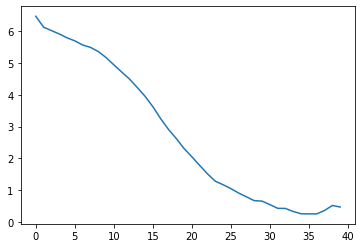

In [40]:
plt.plot(hist.history["loss"])
plt.show()

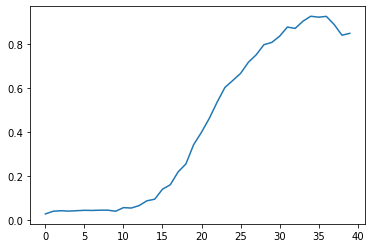

In [41]:
plt.plot(hist.history["accuracy"])
plt.show()

## IX. evaluate

In [42]:
nn.evaluate(x,y)

52/52 [==============================] - 3s 21ms/step - loss: 0.2501 - accuracy: 0.9282


[0.25011926889419556, 0.9281801581382751]

## X. Predict few examples using the model function

In [43]:
def predict_next_word(model,Tokenizer,text):
    seq = Tokenizer.texts_to_sequences([text])
    seq = np.array(seq)
    preds = np.argmax(model.predict(seq))
    for key, value in Tokenizer.word_index.items():
        if value==preds:
            predicted_word = key
            break
    print(predicted_word)
    return predicted_word

In [45]:
predict_next_word(nn,Tokenizer,'if anything kills')

1/1 [==============================] - 1s 825ms/step
overmillion


'overmillion'

In [47]:
predict_next_word(nn,Tokenizer,"yearsartificial intelligence has")

1/1 [==============================] - 0s 26ms/step
proven


'proven'

In [48]:
predict_next_word(nn,Tokenizer,"detecting patterns and")

1/1 [==============================] - 0s 39ms/step
identifying


'identifying'

In [49]:
predict_next_word(nn,Tokenizer,"healthcare sectorsclinical practicestranslational")

1/1 [==============================] - 0s 35ms/step
medical


'medical'

In [50]:
predict_next_word(nn,Tokenizer,"health and medical")

1/1 [==============================] - 0s 36ms/step
facilitiesfor


'facilitiesfor'